In [1]:
# load packages
import os
import sys
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


# Prepare Data

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


In [4]:
# normlize the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [5]:
# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
# reshape input image to 1-channel images form 3-channel images
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# Perceptron Image Classifier

In [7]:
# create a baseline model
model = tf.keras.Sequential()

# flatten the image
model.add(tf.keras.layers.Flatten())

# first dense layer
model.add(tf.keras.layers.Dense(units=512, activation="relu", input_shape=(28, 28)))

# classifier layer
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

# train the model
history1 = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=True,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.2204 - acc: 0.9359 - val_loss: 0.1173 - val_acc: 0.9651
Epoch 2/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0909 - acc: 0.9725 - val_loss: 0.1050 - val_acc: 0.9690
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0613 - acc: 0.9818 - val_loss: 0.0742 - val_acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0465 - acc: 0.9866 - val_loss: 0.0725 - val_acc: 0.9798
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0351 - acc: 0.9894 - val_loss: 0.0735 - val_acc: 0.9803
Epoch 6/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0273 - acc: 0.9921 - val_loss: 0.0750 - val_acc: 0.9802
Epoch 7/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.0212 - acc: 0.9937 - val_loss: 0.0748 - val_acc

### Visualization

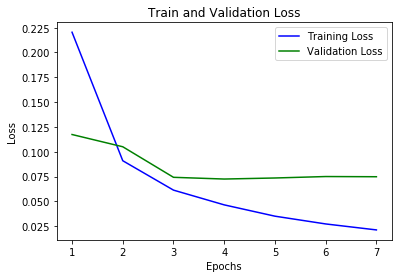

In [8]:
loss, val_loss = history1.history["loss"], history1.history["val_loss"] # accumulate data

epochs = range(1, len(loss) + 1) # number of epochs experiment ran

plt.plot(epochs, loss, "b", label="Training Loss", color="blue")
plt.plot(epochs, val_loss, "b", label="Validation Loss", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Loss")
plt.show()

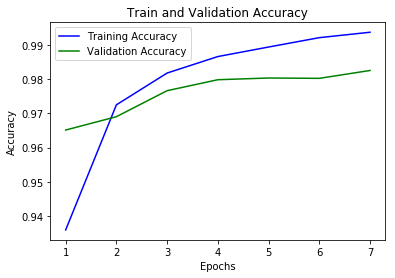

In [9]:
acc, val_acc = history1.history["acc"], history1.history["val_acc"] # accumulate data

epochs = range(1, len(acc) + 1) # number of epochs experiment ran

plt.plot(epochs, acc, "b", label="Training Accuracy", color="blue")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy")
plt.show()

# CNN Classifier

In [11]:
# define a sequential cnn model
model2 = tf.keras.Sequential()

# add a convolutional block
model2.add(tf.keras.layers.Conv2D(filters=32,
                                kernel_size=(2, 2),
                                input_shape=(28, 28, 1)))

# add a max pooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# add a dropout layer
model2.add(tf.keras.layers.Dropout(rate=0.5))

# now flatten the output
model2.add(tf.keras.layers.Flatten())

# add a dense layer with relu activation
model2.add(tf.keras.layers.Dense(256, activation="relu"))

# add a dropout layer
model2.add(tf.keras.layers.Dropout(rate=0.5))

# now add the final output layer: softmax layer
model2.add(tf.keras.layers.Dense(10, activation="softmax"))

# compile the model
model2.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

# train the model
history2 = model2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=True,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.2973 - acc: 0.9102 - val_loss: 0.1182 - val_acc: 0.9632
Epoch 2/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.1560 - acc: 0.9530 - val_loss: 0.0868 - val_acc: 0.9744
Epoch 3/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.1333 - acc: 0.9600 - val_loss: 0.0744 - val_acc: 0.9770
Epoch 4/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.1243 - acc: 0.9633 - val_loss: 0.0777 - val_acc: 0.9768
Epoch 5/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.1230 - acc: 0.9643 - val_loss: 0.0678 - val_acc: 0.9796
Epoch 6/10
60000/60000 [==============================] - 16s 264us/step - loss: 0.1154 - acc: 0.9663 - val_loss: 0.0657 - val_acc: 0.9808
Epoch 7/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.1097 - acc: 0.9670 - val_loss: 0.

### Visualization

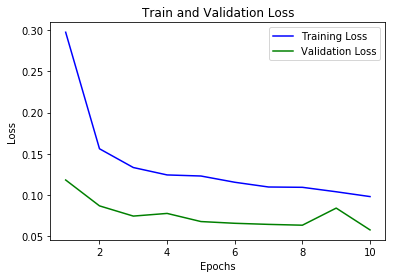

In [12]:
loss, val_loss = history2.history["loss"], history2.history["val_loss"] # accumulate data

epochs = range(1, len(loss) + 1) # number of epochs experiment ran

plt.plot(epochs, loss, "b", label="Training Loss", color="blue")
plt.plot(epochs, val_loss, "b", label="Validation Loss", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Loss")
plt.show()

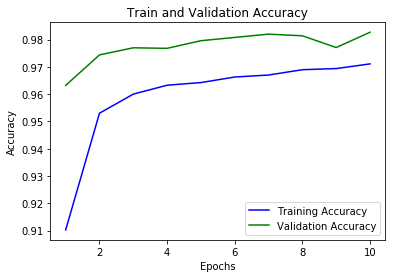

In [13]:
acc, val_acc = history2.history["acc"], history2.history["val_acc"] # accumulate data

epochs = range(1, len(acc) + 1) # number of epochs experiment ran

plt.plot(epochs, acc, "b", label="Training Accuracy", color="blue")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy", color="green")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and Validation Accuracy")
plt.show()

As you can see, the CNN model is more robust and generalized than the simpler perceptron architecture in this scenario even though they perform very similar.